#  real time resturant data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("/content/drive/MyDrive/Dataset ML/Restaurant.xlsx")
data

,DATE,TIME,INVOICE_NO,ITEM,QUANTITY,RATE,SUB_TOTAL,AMOUNT,DAY
0,01.10.23,23.40,174,PAROTTA,4.0,18.0,72.0,NaN,1
1,01.10.23,23.40,174,OMLETTE,2.0,18.0,36.0,108.0,1
2,01.10.23,23.36,173,DOSA,3.0,20.0,60.0,NaN,1
3,01.10.23,23.36,173,PAROTTA,2.0,18.0,36.0,NaN,1
4,01.10.23,23.36,173,KALAKI,1.0,15.0,15.0,111.0,1
...,...,...,...,...,...,...,...,...,...
526,2.10.2285,21.53,146,VEG FRIED RICE,1.0,80.0,80.0,80.0,2
527,2.10.2286,21.53,145,PAROTTA,4.0,18.0,72.0,72.0,2
528,2.10.2287,21.53,147,BUTTER CHICKEN,1.0,130.0,130.0,NaN,2
529,2.10.2288,21.53,147,PAROTTA,2.0,18.0,36.0,166.0,2


In [3]:
data.isnull().sum()

,0
DATE,0
TIME,0
INVOICE_NO,0
ITEM,0
QUANTITY,2
RATE,1
SUB_TOTAL,1
AMOUNT,307
DAY,0


**Bold text  date - 1.10.23 --> total sales**




In [4]:
filtered=data[data['DATE']=='01.10.23']

In [16]:
total_sales=filtered['AMOUNT'].mean()
print(" Total sales on 01.10.23 : ",total_sales)

 Total sales on 01.10.23 :  184.2280701754386


** Invoice - 117 --> total amount**

In [6]:
filter=data[data['INVOICE_NO']==117]

In [17]:
Total_amount = filter['AMOUNT'].sum()
print("Invoice no - 117 Total amount : ",Total_amount)

Invoice no - 117 Total amount :  625.0


** Top 5 - sales**

In [18]:
top_products = data.groupby('ITEM')['SUB_TOTAL'].sum().sort_values(ascending=False)

top_5_products = top_products.head(5)

print("Top 5 products based on Sales :", top_5_products)

Top 5 products based on Sales : ITEM
PAROTTA             5346.0
CHICKEN BIRIYANI    5060.0
MUTTON BIRIYANI     2550.0
PLAIN BIRIYANI      2240.0
DOSA                2160.0
Name: SUB_TOTAL, dtype: float64


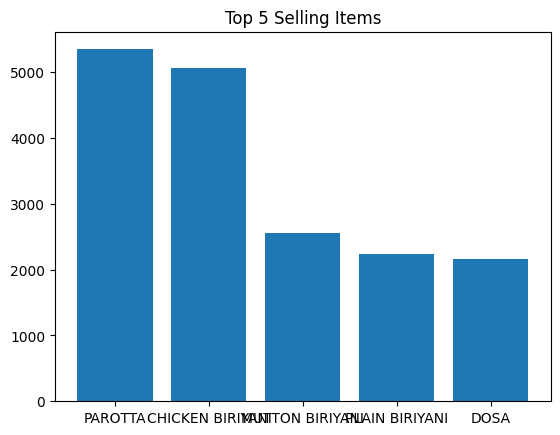

In [19]:
import matplotlib.pyplot as plt
plt.bar(top_5_products.index, top_5_products.head(5))
plt.title('Top 5 Selling Items')
plt.show()

** Quantity wise top sales**

In [20]:
Quantity_sale = data.groupby('ITEM')['QUANTITY'].sum().sort_values(ascending=False)
print("Quantity wise top sales")
Quantity_sale.head(5)


Quantity wise top sales


,QUANTITY
ITEM,
PAROTTA,297.0
DOSA,108.0
CHAPPATHI,50.0
KALAKI,49.0
CHICKEN BIRIYANI,46.0


**date -  2.10.23 --> food sold for least quantity**

In [21]:
filterdate=data[data['DATE']=='2.10.23']
least_quantity = data.groupby('ITEM')['QUANTITY'].sum().sort_values(ascending=True)
print("Food sold for least quantity")
least_quantity.head(5)

Food sold for least quantity


,QUANTITY
ITEM,
MISCELLENOUS,0.0
MISCELLE,0.0
BOILED EGG,1.0
BUCKET BIRIYNI HALF,1.0
CHICKEN HYDERABAD,1.0


** Invoice**

In [22]:
a=data.groupby('INVOICE_NO')['AMOUNT'].sum().sort_values(ascending=True)
print(a)

INVOICE_NO
95      35.0
5       36.0
72      36.0
17      36.0
106     40.0
       ...  
159    768.0
58     808.0
66     835.0
68     892.0
63     941.0
Name: AMOUNT, Length: 153, dtype: float64


** Time -->   6pm to 9pm on 1.10.23 how many porotta sold**

In [26]:
data['TIME'] = pd.to_datetime(data['TIME'])

fil = data[
    (data['DATE'] == '01.10.23') &
    (data['TIME'].dt.hour >= 18) &
    (data['TIME'].dt.hour < 21) &
    (data['ITEM'].str.lower() == 'porotta')
]

porotta_sold = fil['QUANTITY'].sum()
print("Porotta sold between 6PM to 9PM on 01.10.23:", porotta_sold)


Porotta sold between 6PM to 9PM on 01.10.23: 0.0
